# Explanatory visualizations for Ford gobike dataset
## by Mariam Ashraf

## Investigation Overview

Ford GoBike System dataset investigation to answer the questions as what category has more number of rides, and to look at the trip duration through the weekdays and months.

## Dataset Overview

In 2017 Ford gobike system was a re-launch of Bay Wheels which was a regional public bicycle sharing system in California's San Francisco Bay Area in a partnership with Ford Motor Company.
This dataset "Ford GoBike" is the Bay Area's bike share system Ford GoBike, like other bike share systems, consists of a fleet of specially designed, durable bikes.
The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


((519700, 13), None)

In [4]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.user_type = df.user_type.astype('category')
df['duration_hours']= df['duration_sec']/(60*60)
df['start_weekday'] = df['start_time'].dt.strftime('%a')
df['strt_month'] = df['start_time'].dt.strftime('%B')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of rides for each category of user type

This visualization shows only how the number of rides for subscribers is much more than the customers

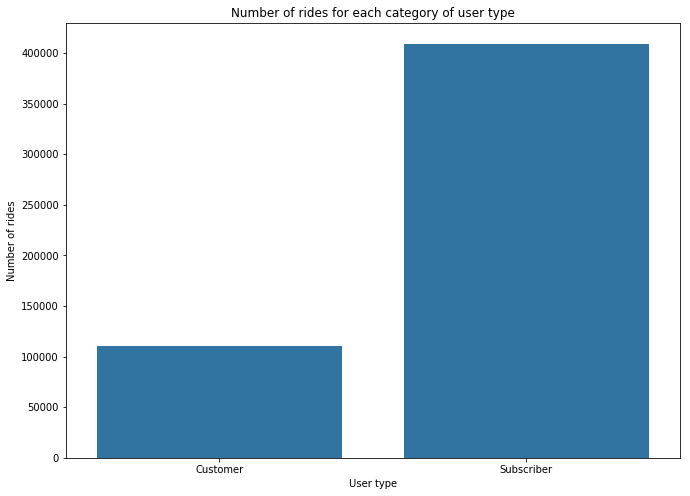

In [5]:
color_base=sb.color_palette()[0]
plt.figure(figsize=[ 11, 8]);
sb.countplot(data=df, x='user_type', color=color_base);
plt.xlabel('User type');
plt.ylabel('Number of rides');
plt.title('Number of rides for each category of user type');

## Number of rides per month

surprisingly August, July, and June "summer months" have lower number of rides compared to the other recorded months, and October has the highest number of rides.

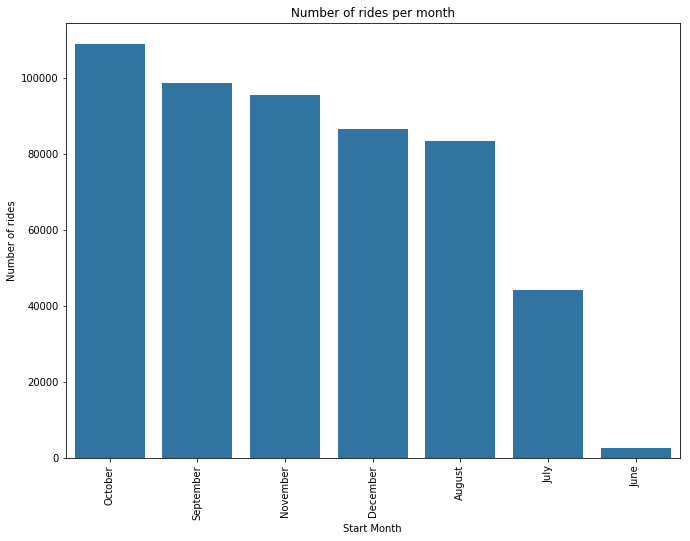

In [6]:
plt.figure(figsize=[ 11, 8]);
months_order=df['strt_month'].value_counts().index
sb.countplot(data=df, x='strt_month', color=color_base, order=months_order);
plt.xticks(rotation=90);
plt.xlabel('Start Month');
plt.ylabel('Number of rides');
plt.title('Number of rides per month');

## Rides duration in seconds

From this visualization we can see that the average trip duration is below half an hour, and 99% of ridings durations are below 3 hours.

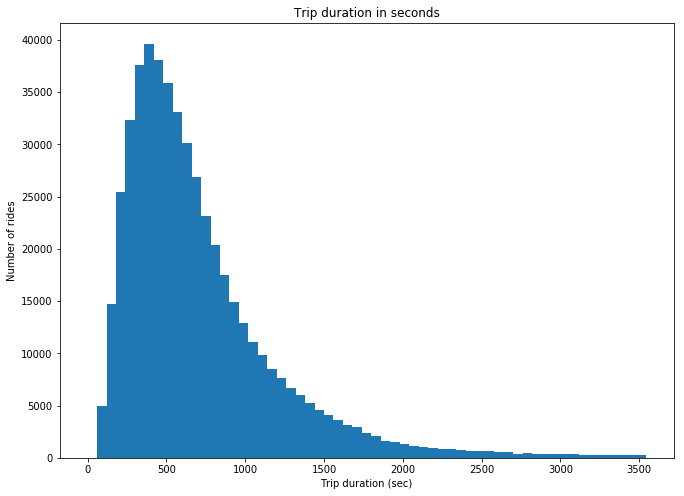

In [7]:
plt.figure(figsize=[ 11, 8]);
bins_e = np.arange(0, 3600, 60)
plt.hist(data = df, x = 'duration_sec', bins = bins_e);
plt.xlabel('Trip duration (sec)');
plt.ylabel('Number of rides');
plt.title('Trip duration in seconds');

## Start month Vs User type

The riders from the customer category are less than from the subscriber category in all months the number of rides of customers are almost constant through all the months except in june both customer and subscriber numbers are very small. 

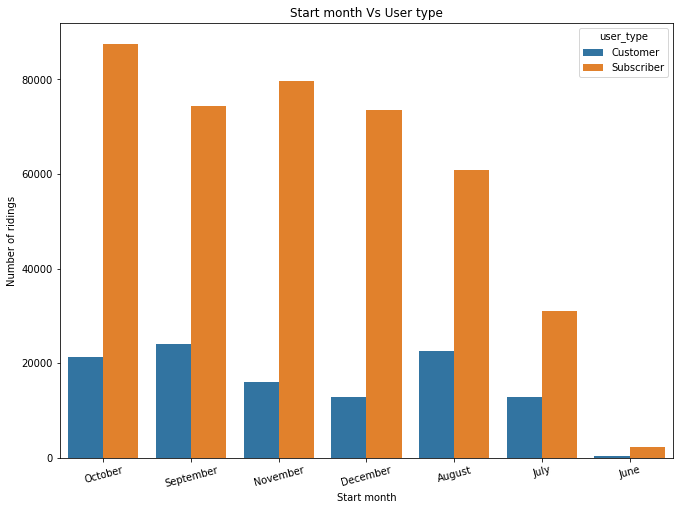

In [8]:
plt.figure(figsize=[ 11, 8]);
months_order=df['strt_month'].value_counts().index
ct_counts=df.groupby(['strt_month', 'user_type']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='strt_month', columns='user_type', values= 'count')
sb.countplot(data=df, x='strt_month', hue='user_type', order=months_order);
plt.xlabel('Start month');
plt.ylabel('Number of ridings');
plt.title('Start month Vs User type');
plt.xticks(rotation=15);

## Start months Vs Trip duration in hours

All the months have almost the same average trip duration in hours for all the riders even in June that has the lowest number of rides, which means that the average trip duration has no relationship with number of rides per month.

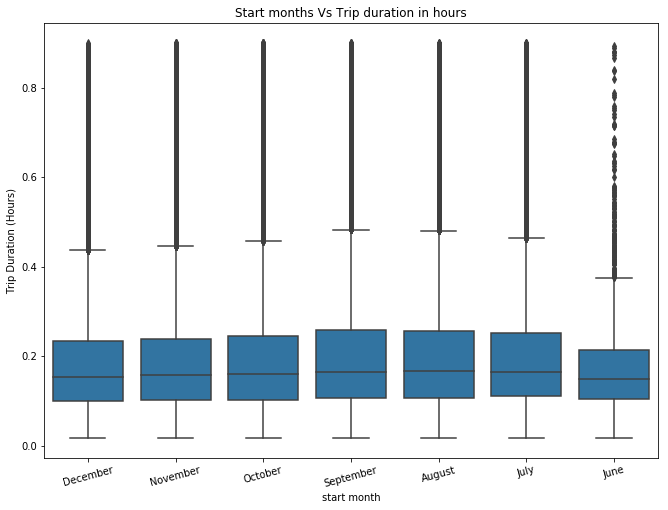

In [9]:
plt.figure(figsize=[ 11, 8]);
df_h=df.query('duration_hours<0.9')
sb.boxplot(data=df_h, x='strt_month', y='duration_hours', color=color_base);
plt.xlabel('start month');
plt.ylabel('Trip Duration (Hours)');
plt.title('Start months Vs Trip duration in hours');
plt.xticks(rotation=15);

## Weekdays Vs Trip duration in hours

The two days that have the least number of rides(sunday and saturday), have the highest average of trip duration, and as the previous visualization this shows us that no relationship between the average trip duration and the number of rides per day.

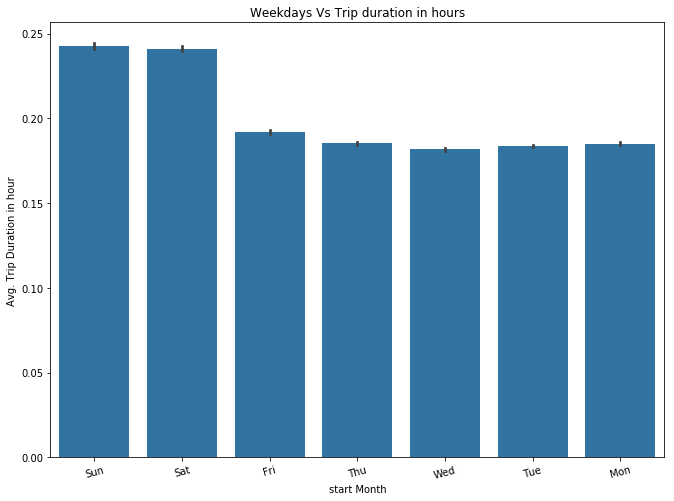

In [10]:
plt.figure(figsize=[ 11, 8]);
sb.barplot(data=df_h, x='start_weekday', y='duration_hours', color=color_base);
plt.xticks(rotation=15);
plt.xlabel('start Month');
plt.ylabel('Avg. Trip Duration in hour');
plt.title('Weekdays Vs Trip duration in hours');

## User type Vs Trip Duration in hours

This visualization of the average of trip duration in hours and the user type indicates that average trip duaration for customers is higher than for subscribers, and this make us think if the subscribers have a more specific goals to achieve compared to customers who took the bikes for longer trip durations.

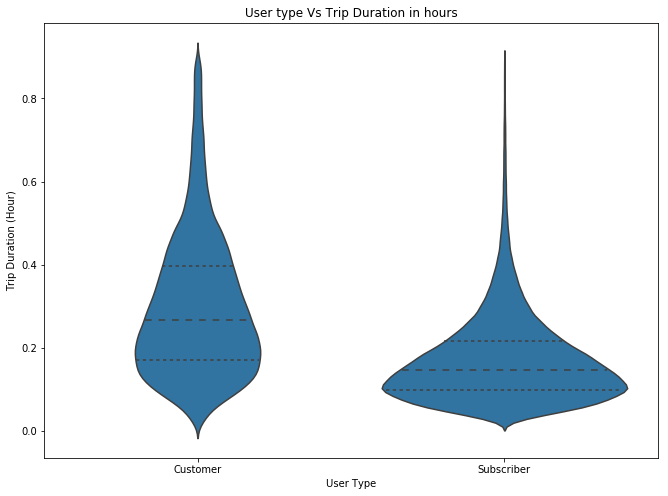

In [11]:
plt.figure(figsize=[ 11, 8]);
sb.violinplot(data=df_h, x='user_type', y='duration_hours',color=color_base, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Hour)');
plt.title('User type Vs Trip Duration in hours');

## weekly Usage during months for Subscribers and customers

From this heat map we can see that both types of users have different pattern of Trip durations through all the weekdays and months, we can see that for customers the number of rides reach its max and exceeds 4000 in september on saturdays and for subscribers only 2 days that have always small number of rides through all months.

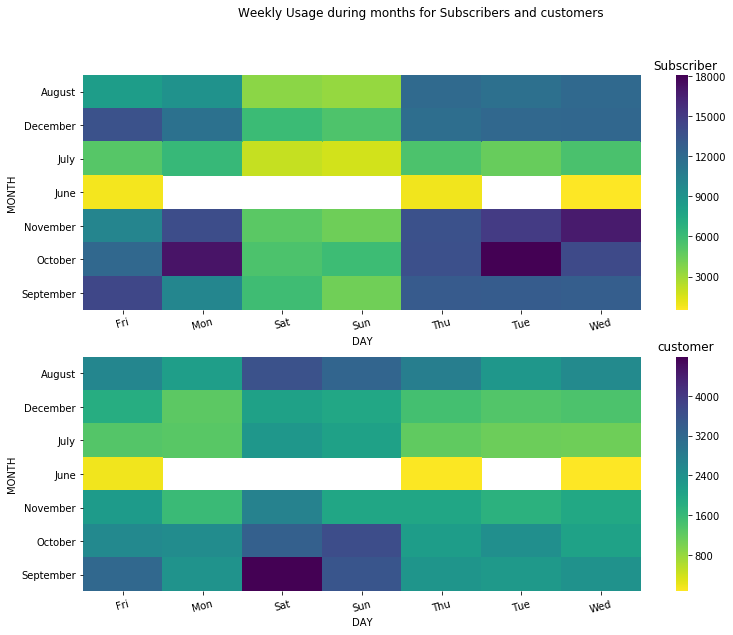

In [12]:
plt.figure(figsize=[ 12.5, 9.5]);
plt.suptitle('Weekly Usage during months for Subscribers and customers')
plt.subplot(2, 1, 1)
subscribers = df_h.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['strt_month', 'start_weekday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='strt_month', columns='start_weekday', values='count')
sb.heatmap(st_counts, cmap='viridis_r');
plt.title('Subscriber', x=1.08);
plt.xlabel('DAY');
plt.ylabel('MONTH');
plt.xticks(rotation=15);

plt.subplot(2, 1, 2)
customers = df_h.query('user_type == "Customer"')
ct_counts = customers.groupby(['strt_month', 'start_weekday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='strt_month', columns='start_weekday', values='count')
sb.heatmap(ct_counts, cmap='viridis_r');
plt.title('customer', x=1.08);
plt.xlabel('DAY');
plt.ylabel('MONTH');
plt.xticks(rotation=15);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!